In [1]:
import pandas as pd
import numpy as np

In [5]:
# create a series
pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd','e'])

a    0.846057
b   -0.252250
c    1.147955
d    0.424693
e    0.361822
dtype: float64

In [6]:
# Preserve the series in variables for later access
s = pd.Series(np.random.randn(5),  index=['a', 'b', 'c', 'd','e'])
print(s)

a    1.024659
b   -1.301530
c   -0.717115
d    0.156355
e   -0.317152
dtype: float64


In [7]:
# Index
print(s[0])
print("\n")
print(s[:3])

1.0246594746


a    1.024659
b   -1.301530
c   -0.717115
dtype: float64


## Exploring DataFrames

In [8]:
# Create a dataframe
df = pd.DataFrame(s, columns = ['Coluna 1'])
df

,Coluna 1
a,1.024659
b,-1.301530
c,-0.717115
d,0.156355
e,-0.317152


In [9]:
# Can access columns by name
df['Coluna 1']

a    1.024659
b   -1.301530
c   -0.717115
d    0.156355
e   -0.317152
Name: Coluna 1, dtype: float64

In [12]:
# Easy to add colummns
df['Coluna 2'] = df['Coluna 1'] * 4
df

,Coluna 1,Coluna 2
a,1.024659,4.098638
b,-1.301530,-5.206121
c,-0.717115,-2.868462
d,0.156355,0.625420
e,-0.317152,-1.268606


In [13]:
# Other manipulation, like sorting. If you want to preserve, set equal to a var
df.sort_values(by = 'Coluna 2')

,Coluna 1,Coluna 2
b,-1.301530,-5.206121
c,-0.717115,-2.868462
e,-0.317152,-1.268606
d,0.156355,0.625420
a,1.024659,4.098638


In [14]:
# Boolean indexing
df[df['Coluna 2'] <= 2]

,Coluna 1,Coluna 2
b,-1.301530,-5.206121
c,-0.717115,-2.868462
d,0.156355,0.625420
e,-0.317152,-1.268606


In [15]:
df.apply(lambda x: min(x) + max(x))
np.mean(df)

Coluna 1   -0.230957
Coluna 2   -0.923826
dtype: float64

In [18]:
table = df.describe()
table 

,Coluna 1,Coluna 2
count,5.000000,5.000000
mean,-0.230957,-0.923826
std,0.882679,3.530717
min,-1.301530,-5.206121
25%,-0.717115,-2.868462
50%,-0.317152,-1.268606
75%,0.156355,0.625420
max,1.024659,4.098638


## Exploring a Dataset

In [19]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

In [22]:
# Read in data into a dataframe
df = pd.read_csv('c:\data\GlobalTemperatures.csv')

# Show the first 5 rows of the  table
df.tail(10)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3182,2015-03-01,6.740,0.060,12.659,0.096,0.894,0.079,15.193,0.061
3183,2015-04-01,9.313,0.088,15.224,0.137,3.402,0.147,15.962,0.061
3184,2015-05-01,12.312,0.081,18.181,0.117,6.313,0.153,16.774,0.058
3185,2015-06-01,14.505,0.068,20.364,0.133,8.627,0.168,17.390,0.057
3186,2015-07-01,15.051,0.086,20.904,0.109,9.326,0.225,17.611,0.058
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [23]:
df = df.ix[:,:2]
df.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [25]:
df.describe()

,LandAverageTemperature
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


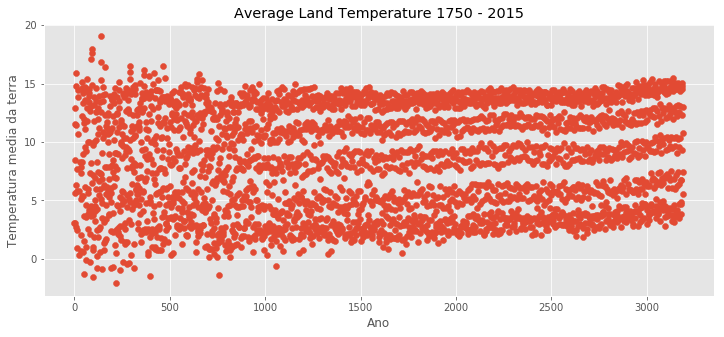

In [26]:
# Cursory plot
plt.figure(figsize = (12,5))
plt.scatter(x = df['LandAverageTemperature'].index, y = df['LandAverageTemperature'])
plt.title("Average Land Temperature 1750 - 2015")
plt.xlabel("Ano")
plt.ylabel("Temperatura media da terra")
plt.show()

In [28]:
# Maybe we can try only by year?
# but notice that the dt column id made up for strings

print(type(df['dt'][0]))

<class 'str'>


In [30]:
# Convert to datetime object
times = pd.DatetimeIndex(df['dt'])

# Group by year
grouped = df.groupby([times.year]).mean()

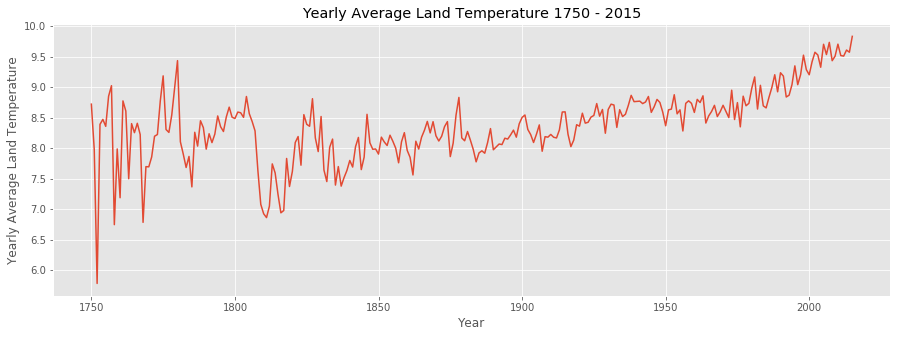

In [31]:
# Plot 
plt.figure(figsize = (15,5))
plt.plot(grouped['LandAverageTemperature'])

#change features of the graph
plt.title("Yearly Average Land Temperature 1750 - 2015")
plt.xlabel("Year")
plt.ylabel("Yearly Average Land Temperature")
plt.show()

In [32]:
# what caused the anomalies?
grouped.head()

,LandAverageTemperature
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [33]:
# Check what happenrd in 1752
df[times.year ==1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


In [34]:
# There are a lot of null values! What else?
df[np.isnan(df['LandAverageTemperature'])]

,dt,LandAverageTemperature
10,1750-11-01,NaN
16,1751-05-01,NaN
18,1751-07-01,NaN
21,1751-10-01,NaN
22,1751-11-01,NaN
23,1751-12-01,NaN
25,1752-02-01,NaN
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN


In [35]:
# Use previous valid  observation to fill gap
df['LandAverageTemperature'] = df['LandAverageTemperature'].fillna(method='ffill')

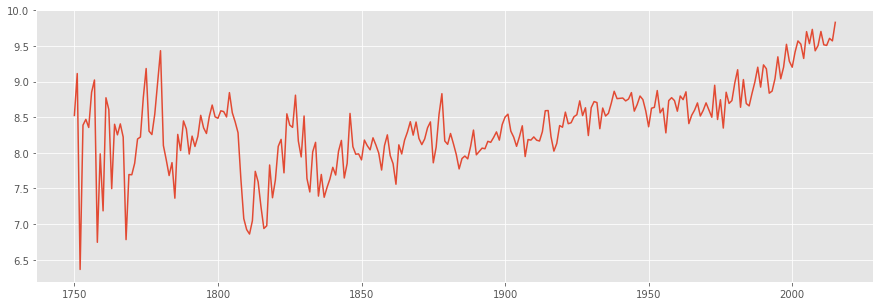

In [37]:
# Regroup and plot

grouped = df.groupby([times.year]).mean()

#Better, but still not perfect
#what are some other ways to fill the NaN values?
plt.figure(figsize=(15,5))
plt.plot(grouped['LandAverageTemperature'])
plt.show()

## Modeling a Dataset

In [40]:
# Let's model!
from sklearn.linear_model import LinearRegression as LinReg

In [41]:
x = grouped.index.values.reshape(-1,1)
y = grouped['LandAverageTemperature'].values

In [43]:
reg = LinReg()
reg.fit(x,y)
y_preds = reg.predict(x)
print("Accuracy: " + str(reg.score(x,y)))

Accuracy: 0.376683227531


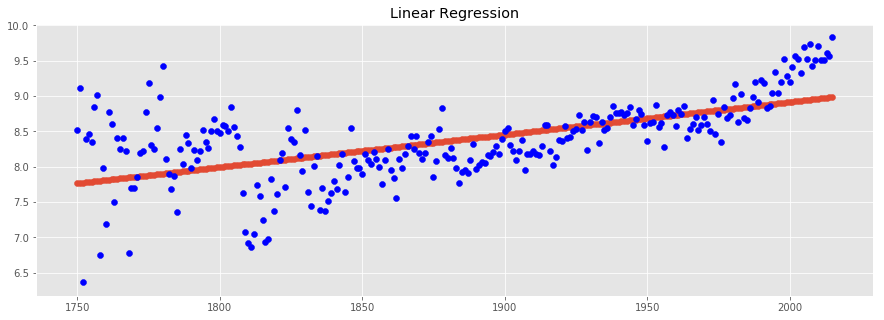

In [44]:
plt.figure(figsize=(15,5))
plt.title("Linear Regression")
plt.scatter(x = x, y = y_preds)
plt.scatter(x = x, y = y, c = "b")

In [45]:
reg.predict(2050)

array([ 9.14631486])